In [1]:
!pip install tensorflow
!pip install torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.patches as patches
import os
import cv2
import torch

from PIL import Image

In [2]:
train_img_files = os.listdir('fall_dataset/images/train')
train_img_files.sort()
r1 = 'fall_dataset/images/train/'
train_label_files = os.listdir('fall_dataset/labels/train')
train_label_files.sort()
r2 = 'fall_dataset/labels/train/'

In [3]:
print(len(train_img_files))
print(len(train_label_files))

375
374


In [4]:
complete_images = []
complete_class = []

In [5]:
for i in range(len(train_label_files)):
    if train_img_files[i].startswith('.'):
        continue
    img = plt.imread(r1+train_img_files[i])
    with open(r2+train_label_files[i],'r') as file:
        r = file.readlines()
    bounding_boxes = []
    for j in r:
        j = j.split()
        bounding_boxes.append([int(j[0]),float(j[1]),float(j[2]),float(j[3]),float(j[4])])
    for box in bounding_boxes:
        image_height, image_width, _ = img.shape
        xmin, ymin, width, height = box[1:]
        xmin = int(xmin * image_width)
        ymin = int(ymin * image_height)
        width = int(width * image_width)
        height = int(height * image_height)
        complete_class.append(box[0])
        complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])

In [6]:
pref_size = (128,128)
for i in range(len(complete_images)):
    complete_images[i] = cv2.resize(complete_images[i],pref_size)

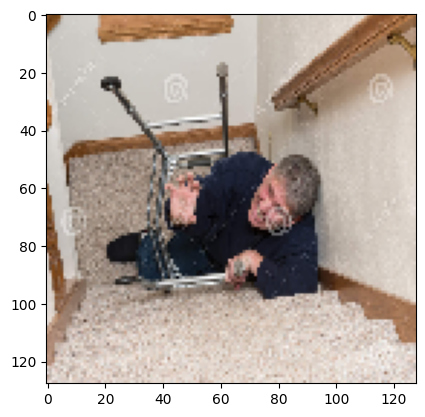

In [7]:
img = complete_images[86]
plt.imshow(img)
plt.show()

In [8]:
df = pd.DataFrame()
df['Images'] = complete_images
df['Class'] = complete_class
df['Images']/=255

In [9]:
# from tensorflow import keras

# model = keras.Sequential([
#     # First Convolutional Layer
#     keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(128, 128, 3), activation='relu'),
#     keras.layers.MaxPooling2D(),

#     # Second Convolutional Layer
#     keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#     keras.layers.MaxPooling2D(),

#     # Third Convolutional Layer
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D(),
    
#     # Flatten layer to transition from convolutional to dense layers
#     keras.layers.Flatten(),

#     # Dense (Fully Connected) Layers
#     keras.layers.Dense(128, activation='relu'),

#     # Output layer (Assuming binary classification, use 'sigmoid' for binary, 'softmax' for multi-class)
#     keras.layers.Dense(3, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Display the model summary
# model.summary()


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding your classification layers
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # Binary classification, so use 1 output with sigmoid activation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
X_train = np.array(df['Images'].tolist())
y_train = np.array(df['Class'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 14s 893ms/step - loss: 1.8780 - accuracy: 0.4425
Epoch 2/20
15/15 [==============================] - 14s 911ms/step - loss: 0.8094 - accuracy: 0.6372
Epoch 3/20
15/15 [==============================] - 15s 1s/step - loss: 0.6482 - accuracy: 0.7257
Epoch 4/20
15/15 [==============================] - 15s 993ms/step - loss: 0.5163 - accuracy: 0.7920
Epoch 5/20
15/15 [==============================] - 15s 998ms/step - loss: 0.4479 - accuracy: 0.8363
Epoch 6/20
15/15 [==============================] - 15s 1s/step - loss: 0.4041 - accuracy: 0.8429
Epoch 7/20
15/15 [==============================] - 15s 1s/step - loss: 0.3081 - accuracy: 0.8894
Epoch 8/20
15/15 [==============================] - 18s 1s/step - loss: 0.2794 - accuracy: 0.9137
Epoch 9/20
15/15 [==============================] - 19s 1s/step - loss: 0.2548 - accuracy: 0.9049
Epoch 10/20
15/15 [==============================] - 16s 1s/step - loss: 0.2321 - accuracy: 0.9336
Epoch 1

KeyboardInterrupt: 

In [12]:
# Save the model
model.save('my_model.keras')

# Download the saved model files from Kaggle
from IPython.display import FileLink
FileLink(r'my_model.keras')

c:\Users\puthe\Documents\65010646\my_model.keras

In [13]:
train_img_files = os.listdir('fall_dataset/images/val')
train_img_files.sort()
r1 = 'fall_dataset/images/val/'
train_label_files = os.listdir('fall_dataset/labels/val')
train_label_files.sort()
r2 = 'fall_dataset/labels/val/'

In [14]:
print(len(train_img_files))
print(len(train_label_files))

112
111


In [15]:
complete_images = []
complete_class = []

In [16]:
for i in range(len(train_label_files)):
    if train_img_files[i].startswith('.'):
        continue
    img = plt.imread(r1+train_img_files[i])
    with open(r2+train_label_files[i],'r') as file:
        r = file.readlines()
    bounding_boxes = []
    for j in r:
        j = j.split()
        bounding_boxes.append([int(j[0]),float(j[1]),float(j[2]),float(j[3]),float(j[4])])
    for box in bounding_boxes:
        image_height, image_width, _ = img.shape
        xmin, ymin, width, height = box[1:]
        xmin = int(xmin * image_width)
        ymin = int(ymin * image_height)
        width = int(width * image_width)
        height = int(height * image_height)
        complete_class.append(box[0])
        complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])

In [17]:
pref_size = (128,128)
for i in range(len(complete_images)):
    complete_images[i] = cv2.resize(complete_images[i],pref_size)

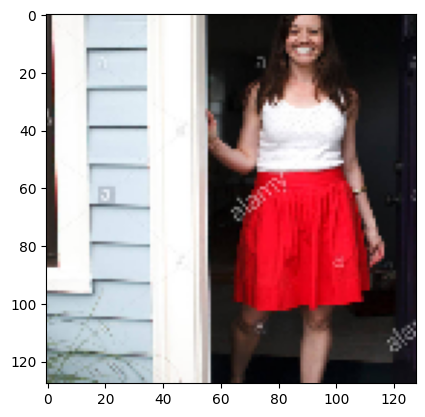

In [18]:
img = complete_images[86]
plt.imshow(img)
plt.show()

In [19]:
df = pd.DataFrame()
df['Images'] = complete_images
df['Class'] = complete_class
df['Images']/=255

In [20]:
X_test = np.array(df['Images'].tolist())
y_test = np.array(df['Class'])

In [21]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 4s 808ms/step - loss: 0.7000 - accuracy: 0.7522


[0.6999730467796326, 0.752212405204773]

In [22]:
# Load YOLOv5 model
import torch.hub

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
yolo_model.classes = [0]

Using cache found in C:\Users\puthe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-26 Python-3.9.5 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [23]:

# def print_and_save_bounding_boxes(results, image_path):
#     # Extract image width and height
#     img = Image.open(image_path)
#     image_width, image_height = img.size
#     img_filename = os.path.splitext(os.path.basename(image_path))[0]  # Get filename without path or extension

#     # Create filename for text file
#     filename = f"{img_filename}.txt"
#     with open(filename, "w") as f:
#         boxes =[]
#         for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
#             x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
#             if(confidence>0.5):
#                 label = results.names[int(class_id)]
#                 class_label = class_id
#                 x_center = (x_min + x_max) / 2 / image_width
#                 y_center = (y_min + y_max) / 2 / image_height
#                 norm_width = (x_max - x_min) / image_width
#                 norm_height = (y_max - y_min) / image_height

#                 print(f"Labels: {x_center} {y_center} {norm_width} {norm_height} {confidence}")
#                 print(f"Object {i + 1}: {label} (Confidence: {confidence:.2f})")
#                 f.write(f"{label} {x_center} {y_center} {norm_width} {norm_height} {confidence}\n")
#                 temp = [x_center,y_center,norm_width,norm_height]
#                 boxes.append(temp)
#         return boxes         

# # Function to draw bounding box on the detected object and print coordinates
# def draw_bounding_box(img_array, object_number, x, y, x_plus_w, y_plus_h):
#     color = (0, 255, 0)  # BGR
#     cv2.rectangle(img_array, (x, y), (x_plus_w, y_plus_h), color, 2)
    

# # Function to perform object detection
# def detect_objects(image_path):
#     # Load image
#     img = Image.open(image_path)

#     # Convert Image object to NumPy array
#     img_array = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # Note: Color conversion
#     results = yolo_model(img, size=640)  # includes NMS
#     #results.print()  
#     results.show()
#     boxes  = print_and_save_bounding_boxes(results, image_path)
#     # print("hi:",results.xyxy[0])
#     num_bounding_boxes = len(results.xyxy[0])  # Number of bounding boxes
#     print(f"Number of Objects Detected {num_bounding_boxes}")
#     # Draw bounding boxes
#     for i in range(num_bounding_boxes):
#         x, y, x_plus_w, y_plus_h, _, _ = results.xyxy[0][i]
#         draw_bounding_box(img_array, i + 1, round(x.item()), round(y.item()), round(x_plus_w.item()), round(y_plus_h.item()))

#     return boxes


In [24]:
# image_path = '/fall_dataset/images/fall001.jpg'  # replace 'your_image.jpg' with the actual image file path
# def predictions (image_path):
# #     img = cv2.imread(image_path) 
# #     img = cv2.resize(img, pref_size)
# #     img = img / 255.0
# #     img = np.expand_dims(img, axis=0)
    
# #     for i in range(len(train_img_files)):
#     img = plt.imread(image_path)
# #     with open(r2+train_label_files[i],'r') as file:
# #         r = file.readlines()
#     bounding_boxes = detect_objects(image_path)
#     print(bounding_boxes)    
# #     for j in r:
# #         j = j.split()
# #        bounding_boxes.append([int(j[0]),float(j[1]),float(j[2]),float(j[3]),float(j[4])])
#     complete_images=[]
#     for box in bounding_boxes:
#         image_height, image_width, _ = img.shape
#         xmin, ymin, width, height = box[:]
#         xmin = int(xmin * image_width)
#         ymin = int(ymin * image_height)
#         width = int(width * image_width)
#         height = int(height * image_height)
# #         complete_class.append(box[0])
#         complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
#     for cropped_img in complete_images:
#         plt.imshow(cropped_img)
#         plt.axis('off')  # Turn off axis
#         plt.show()
# #         img_n = cv2.resize(img, pref_size)
# #         plt.imshow(img_n)
# #         plt.show()
# #         print(img_n.shape)
# #         img_n = img_n /255.0
# #         img_n = np.expand_dims(img, axis=0)
# #         predictions = model.predict(img_n)
# #         print(np.argmax(predictions))
#         cropped_img_resized = cv2.resize(cropped_img, pref_size)
#         plt.imshow(cropped_img_resized)
#         plt.show()
#         cropped_img_resized = cropped_img_resized / 255.0
#         #cv2.imshow(cropped_img_resized)
#         cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
#         predictions = model.predict(cropped_img_resized)
#         k=np.argmax(predictions)
#         print(np.argmax(predictions))
#         if(k==0):
#             print("Fall detected")
#         elif(k==1):
#             print("No fall detected. Person is walking or standing")
#         else:
#             print("No fall detected. Person is sitting.")
# predictions (image_path)
    

In [25]:
def get_boxes(image_path):
    img = Image.open(image_path)
    image_width, image_height = img.shape
    results = yolo_model(img, size=640)
    img_filename = os.path.splitext(os.path.basename(image_path))[0]
    filename = f"{img_filename}.txt"
    with open(filename, "w") as f:
        boxes =[]
        for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
            x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
            if(confidence>0.5):
                label = results.names[int(class_id)]
                class_label = class_id
                x_center = (x_min + x_max) / 2 / image_width
                y_center = (y_min + y_max) / 2 / image_height
                norm_width = (x_max - x_min) / image_width
                norm_height = (y_max - y_min) / image_height
                f.write(f"{label} {x_center} {y_center} {norm_width} {norm_height} {confidence}\n")
                temp = [x_center,y_center,norm_width,norm_height]
                boxes.append(temp)
        return boxes
    

In [26]:
def get_boxes_vid(frame):
    img = frame
    image_width, image_height = img.shape
    results = yolo_model(img, size=640)
    boxes =[]
    for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
        x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
        if(confidence>0.5):
            label = results.names[int(class_id)]
            class_label = class_id
            x_center = (x_min + x_max) / 2 / image_width
            y_center = (y_min + y_max) / 2 / image_height
            norm_width = (x_max - x_min) / image_width
            norm_height = (y_max - y_min) / image_height
            temp = [x_center,y_center,norm_width,norm_height]
            boxes.append(temp)
        return boxes

In [27]:
def pred(image_path):
    bounding_boxes=get_boxes(image_path)
    img=plt.imread(image_path)
    complete_images=[]
    for box in bounding_boxes:
        image_height, image_width, _ = img.shape
        xmin, ymin, width, height = box[:]
        xmin = int(xmin * image_width)
        ymin = int(ymin * image_height)
        width = int(width * image_width)
        height = int(height * image_height)
#         complete_class.append(box[0])
        complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
    for cropped_img in complete_images:
#         print("space")
#         plt.imshow(cropped_img)
#         plt.axis('off')  # Turn off axis
#         plt.show()
#         print("space")
        cropped_img_resized = cv2.resize(cropped_img, pref_size)
#         plt.imshow(cropped_img_resized)
#         plt.show()
        cropped_img_resized = cropped_img_resized / 255.0
        cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
        predictions = model.predict(cropped_img_resized)
        k=np.argmax(predictions)
        print(np.argmax(predictions))
        if(k==0):
            print("Fall detected")
        elif(k==1):
            print("No fall detected. Person is walking or standing")
        else:
            print("No fall detected. Person is sitting.")
                

        

In [28]:
def pred_vid(frame):
    bounding_boxes=get_boxes_vid(frame)
    img=frame
    complete_images=[]
    for box in bounding_boxes:
        image_height, image_width, _ = img.shape
        xmin, ymin, width, height = box[:]
        xmin = int(xmin * image_width)
        ymin = int(ymin * image_height)
        width = int(width * image_width)
        height = int(height * image_height)
#         complete_class.append(box[0])
        complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
    for cropped_img in complete_images:
#         print("space")
#         plt.imshow(cropped_img)
#         plt.axis('off')  # Turn off axis
#         plt.show()
#         print("space")
        cropped_img_resized = cv2.resize(cropped_img, pref_size)
#         plt.imshow(cropped_img_resized)
#         plt.show()
        cropped_img_resized = cropped_img_resized / 255.0
        cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
        predictions = model.predict(cropped_img_resized)
        k=np.argmax(predictions)
        return k
#         print(np.argmax(predictions))
#         if(k==0):
#             print("Fall detected")
#         elif(k==1):
#             print("No fall detected. Person is walking or standing")
#         else:
#             print("No fall detected. Person is sitting.")
                

        

In [29]:
# image_path = '/kaggle/input/trial3/WhatsApp Image 2024-02-08 at 00.53.01_1f29048a.jpg'
# pred(image_path)

In [2]:
# import cv2
# import time
# import numpy as np


# # Open the webcam
# cap = cv2.VideoCapture(0)

# # Check if the webcam is opened successfully
# if not cap.isOpened():
#     print("Error: Unable to open webcam")
#     exit()

# # Initialize variables
# snapshot_interval = 2.5  # Time interval between snapshots in seconds
# last_snapshot_time = time.time()
    

# def get_boxes_vid(frame):
#     img = frame
#     image_height, image_width, _ = img.shape  # Unpack 3 values: height, width, channels
#     results = yolo_model(img, size=640)
#     boxes = []
#     for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
#         x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
#         if confidence > 0.5:
#             label = results.names[int(class_id)]
#             class_label = class_id
#             x_center = (x_min + x_max) / 2 / image_width
#             y_center = (y_min + y_max) / 2 / image_height
#             norm_width = (x_max - x_min) / image_width
#             norm_height = (y_max - y_min) / image_height
#             temp = [x_center, y_center, norm_width, norm_height]
#             boxes.append(temp)
#     return boxes


# def pred_vid(frame):
#     bounding_boxes=get_boxes_vid(frame)
#     img=frame
#     complete_images=[]
#     for box in bounding_boxes:
#         image_height, image_width, _ = img.shape
#         xmin, ymin, width, height = box[:]
#         xmin = int(xmin * image_width)
#         ymin = int(ymin * image_height)
#         width = int(width * image_width)
#         height = int(height * image_height)
        
# #         complete_class.append(box[0])
#         complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
#     for cropped_img in complete_images:
# #         print("space")
# #         plt.imshow(cropped_img)
# #         plt.axis('off')  # Turn off axis
# #         plt.show()
# #         print("space")
#         cropped_img_resized = cv2.resize(cropped_img, pref_size)
# #         plt.imshow(cropped_img_resized)
# #         plt.show()
#         cropped_img_resized = cropped_img_resized / 255.0
#         cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
#         predictions = model.predict(cropped_img_resized)
#         k=np.argmax(predictions)
#         return k
# #         print(np.argmax(predictions))
# #         if(k==0):
# #             print("Fall detected")
# #         elif(k==1):
# #             print("No fall detected. Person is walking or standing")
# #         else:
# #             print("No fall detected. Person is sitting.")
                

        

# while True:
#     # Capture frame-by-frame from the webcam
#     ret, frame = cap.read()

#     # Check if frame is captured successfully
#     if not ret:
#         print("Error: Unable to capture frame")
#         break

#     # Display the captured frame
#     cv2.imshow('Webcam', frame)

#     # Take snapshot if the time interval has elapsed
#     current_time = time.time()
#     if current_time - last_snapshot_time >= snapshot_interval:
#         # Perform fall detection on the snapshot
#         fall_detected = pred_vid(frame)

#         # Print the result
#         if fall_detected == 0:
#             print("Fall detected!")
#         else:
#             print("No fall detected")

#         # Update the last snapshot time
#         last_snapshot_time = current_time

#     # Check for key press to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close all OpenCV windows
# cap.release()
# cv2.destroyAllWindows()


NameError: name 'yolo_model' is not defined

In [31]:
# import cv2
# import numpy as np

# # Define the video file path
# video_path = 'your_video.mp4'

# # Function to detect objects and perform fall detection on video frames
# def detect_fall_in_video(video_path):
#     cap = cv2.VideoCapture(video_path)
#     frame_count = 0
#     fall_detected = False

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Perform object detection on the frame and obtain bounding boxes
#         bounding_boxes = detect_objects(frame)
#         img=frame
#         complete_images=[]

#         # Perform fall detection based on bounding boxes
#         for box in bounding_boxes:
#             image_height, image_width, _ = img.shape
#             xmin, ymin, width, height = box[:]
#             xmin = int(xmin * image_width)
#             ymin = int(ymin * image_height)
#             width = int(width * image_width)
#             height = int(height * image_height)
#             complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
#         for cropped_img in complete_images:   
#             if is_fall(cropped_img):
#                 fall_detected = True
#                 break

#         # Display the frame with bounding boxes
#         cv2.imshow('Frame', frame)
#         frame_count += 1

#         # Check if fall is detected or if all frames have been processed
#         if fall_detected or cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()

#     # Check if fall is detected and print appropriate message
#     if fall_detected:
#         print("Fall detected in the video!")
#     else:
#         print("No fall detected in the video.")

# # Function to perform object detection on a single frame (replace with your implementation)
# def detect_objects(frame):
#     img = frame
#     image_width, image_height = img.size 
#     results = yolo_model(img, size=640)
# #     img_filename = os.path.splitext(os.path.basename(image_path))[0]
# #     filename = f"{img_filename}.txt"
# #     with open(filename, "w") as f:
#         boxes =[]
#         for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
#             x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
#             if(confidence>0.5):
#                 label = results.names[int(class_id)]
#                 class_label = class_id
#                 x_center = (x_min + x_max) / 2 / image_width
#                 y_center = (y_min + y_max) / 2 / image_height
#                 norm_width = (x_max - x_min) / image_width
#                 norm_height = (y_max - y_min) / image_height
# #                 f.write(f"{label} {x_center} {y_center} {norm_width} {norm_height} {confidence}\n")
#                 temp = [x_center,y_center,norm_width,norm_height]
#                 boxes.append(temp)
#     return boxes

# # Function to perform fall detection based on bounding boxes (replace with your implementation)
# def is_fall(box):
#     # Implement your fall detection logic here
#     # Return True if a fall is detected based on the bounding box, otherwise return False
#     return False

# # Call the function to detect fall in the video
# detect_fall_in_video(video_path)


In [ ]:
import cv2
import time
import numpy as np


# Open the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Unable to open webcam")
    exit()

# Initialize variables
snapshot_interval = 2.5  # Time interval between snapshots in seconds
last_snapshot_time = time.time()
    

def get_boxes_vid(frame):
    img = frame
    image_height, image_width, _ = img.shape  # Unpack 3 values: height, width, channels
    results = yolo_model(img, size=640)
    boxes = []
    for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
        x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
        if confidence > 0.5:
            label = results.names[int(class_id)]
            class_label = class_id
            x_center = (x_min + x_max) / 2 / image_width
            y_center = (y_min + y_max) / 2 / image_height
            norm_width = (x_max - x_min) / image_width
            norm_height = (y_max - y_min) / image_height
            temp = [x_center, y_center, norm_width, norm_height, x_min, y_min, x_max, y_max]
            boxes.append(temp)
    return boxes


def pred_vid(frame):
    bounding_boxes = get_boxes_vid(frame)
    img = frame
    complete_images = []
    for box in bounding_boxes:
        image_height, image_width, _ = img.shape
        # Retrieve coordinates from the bounding box
        xmin, ymin, x_max, y_max = box[4:8]  # Get the bounding box coordinates
        
        # Draw the bounding box on the image
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(x_max), int(y_max)), (0, 255, 0), 2)  # Green box with thickness 2

        # Extract the cropped image
        complete_images.append(img[ymin:y_max, xmin:x_max])

    for cropped_img in complete_images:
        cropped_img_resized = cv2.resize(cropped_img, pref_size)
        cropped_img_resized = cropped_img_resized / 255.0
        cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
        predictions = model.predict(cropped_img_resized)
        k = np.argmax(predictions)
        return k

    # Show the image with bounding boxes
    cv2.imshow('Webcam with Bounding Boxes', img)  # Display the frame with bounding boxes


while True:
    # Capture frame-by-frame from the webcam
    ret, frame = cap.read()

    # Check if frame is captured successfully
    if not ret:
        print("Error: Unable to capture frame")
        break

    # Take snapshot if the time interval has elapsed
    current_time = time.time()
    if current_time - last_snapshot_time >= snapshot_interval:
        # Perform fall detection on the snapshot
        fall_detected = pred_vid(frame)

        # Print the result
        if fall_detected == 0:
            print("Fall detected!")
        else:
            print("No fall detected")

        # Update the last snapshot time
        last_snapshot_time = current_time

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
